# Upscale Images with Pre-trained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image)

---

Notebook to use the `super-image` library to quickly upscale and image.

The technique used is applying a pre-trained deep-learning model to restore a high resolution (HR) image from a single low resolution (LR) image. This is also called image super resolution.

The notebook is structured as follows:
* Setting up the Environment
* Using the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` library using `pip install`.

In [4]:
!pip install -qq super-image

## Using the Model (Running Inference)

Next we run a few lines of code to:

* `Image.open` and `requests.get` - Download an image from a URL (website) and store this as the `image` variable.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable.
* `ImageLoader.load_image` - Load the image into the `model` using the `ImageLoader` helper.
* Use the model to run inference on the image (`inputs`).
* `ImageLoader.save_image` - Save the upscaled image output as a `.png` file using the `ImageLoader` helper.
* `ImageLoader.save_compare` - Save a `.png` that compares our upscaled image from the model with a baseline image using `Bicubic` upscaling.

In [3]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
image = Image.open(requests.get(url, stream=True).raw)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

Downloading:   0%|          | 0.00/221 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


View the comparison image to see, visually, how our model performed (on the right) against the baseline bicubic method (left).

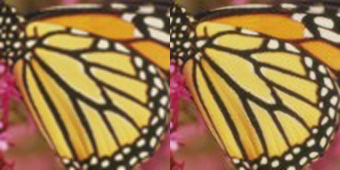

In [5]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('./scaled_2x_compare.png') 
cv2_imshow(img)

We can view the original image that we pulled from the URL/website using `cv2_imshow`.

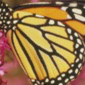

In [11]:
import numpy as np

cv2_imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))